# 0. Librerías


In [1]:
!pip install plotly_express
import plotly_express as px
!pip install plotly --upgrade
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
import seaborn as sns


In [11]:

df = pd.read_csv('datos_ejercicio_ventas.csv', sep = ",")

df_actual = df[df['SCENARIO'] == 'actual']

# 1. Analizar cómo se distribuyen las ventas realizadas en:


## 1.1. Cada país

In [3]:
fig_country = px.histogram(
    df_actual,
    x='COUNTRY',
    y='AMOUNT',
    color='COUNTRY',
    title='Distribución de Ventas por País',
    labels={'AMOUNT': 'Monto de Ventas', 'COUNTRY': 'País'}
)
fig_country.show()

## 1.2. Cada mes y año


<ipython-input-4-1e834a5c0368>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



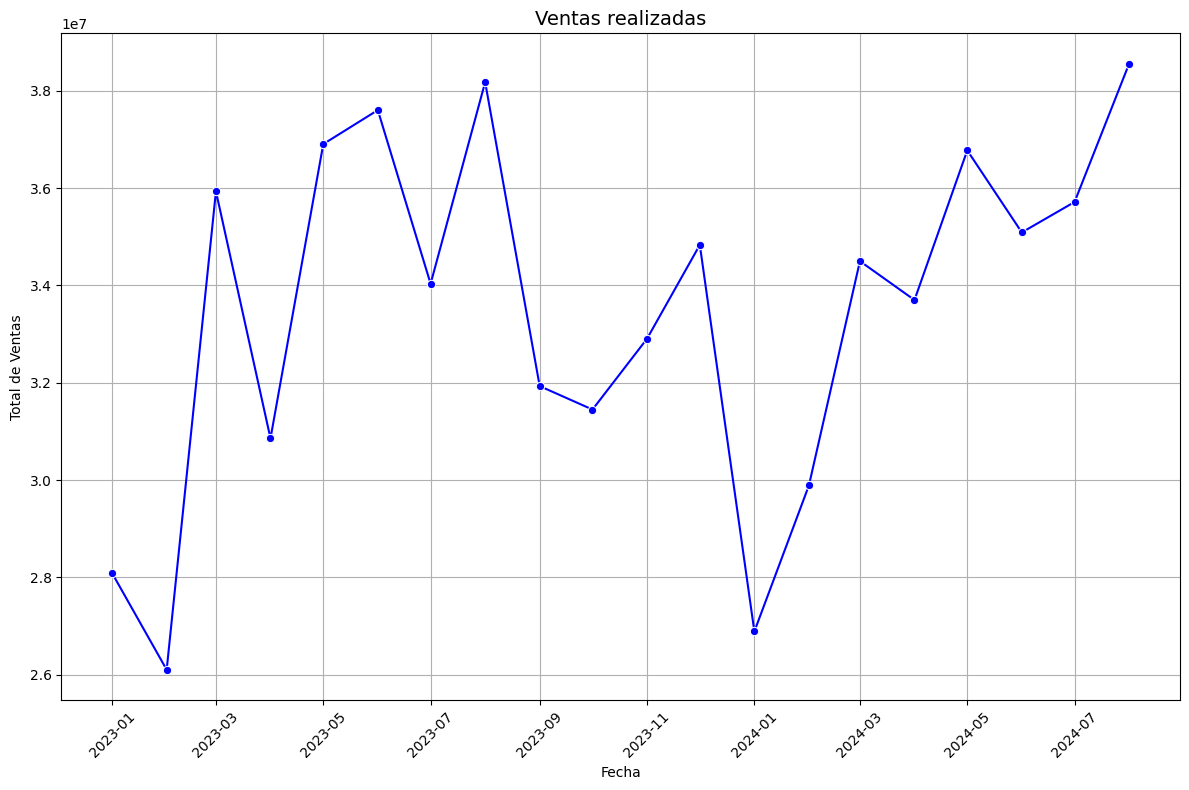

In [4]:
# Creamos la fecha completa
df_actual['DATE'] = pd.to_datetime(df_actual[['YEAR', 'MONTH']].assign(DAY=1))

# Agrupar y sumar las ventas por fecha (por mes)
sales_by_date = df_actual.groupby('DATE')['AMOUNT'].sum().reset_index()

# Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.lineplot(x='DATE', y='AMOUNT', data=sales_by_date, marker='o', color='blue')
plt.title('Ventas realizadas', fontsize=14)
plt.xlabel('Fecha', fontsize=10)
plt.ylabel('Total de Ventas', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

## 1.3. Cada marca

In [5]:
fig_brand = px.histogram(
    df_actual,
    x='SUBBRAND',
    y='AMOUNT',
    color='SUBBRAND',
    title='Distribución de Ventas por Marca',
    labels={'AMOUNT': 'Monto de Ventas', 'SUBBRAND': 'Marca'}
)
fig_brand.show()

# 2. Cual es la tendencia y estacionalidad de:


## 2.1. Todas las ventas del país con menos ventas


COUNTRY
Spain            8.131266e+06
Portugal         3.488807e+07
Czech            3.535164e+07
Hungary          4.153991e+07
Italy            4.345404e+07
Norway           5.121406e+07
Denmark          5.659668e+07
Netherlands      6.395943e+07
Great Britain    3.347786e+08
Name: AMOUNT, dtype: float64


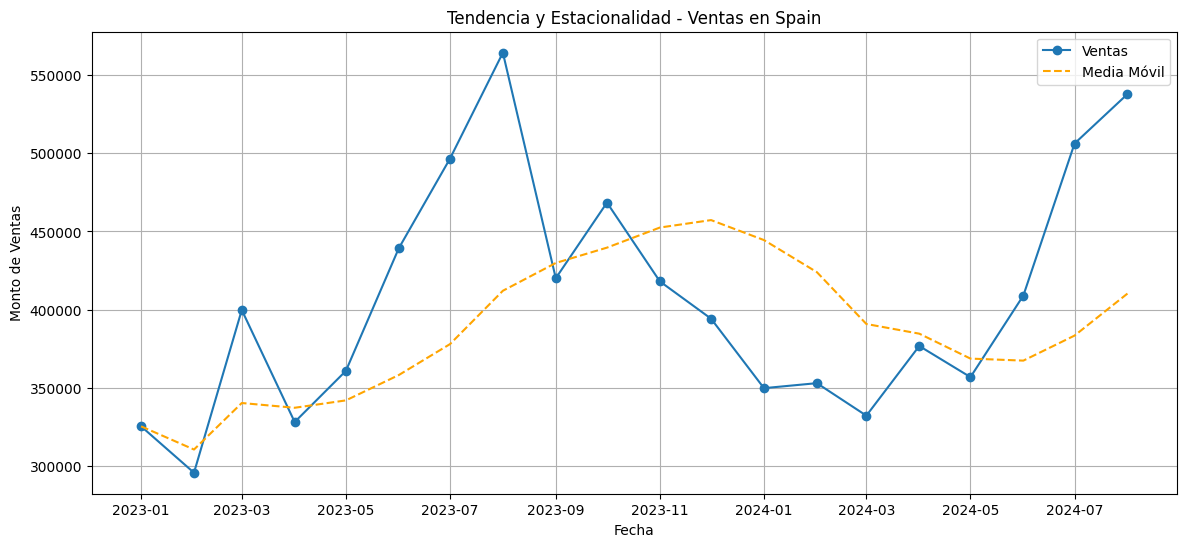

In [6]:
# Filtrar solo los registros donde SCENARIO es "actual"
df_actual = df[df['SCENARIO'] == 'actual'].copy()  # Usar .copy() para evitar el warning

# Crear la fecha completa
df_actual['DATE'] = pd.to_datetime(df_actual[['YEAR', 'MONTH']].assign(DAY=1))

# Identificar el país con menos ventas en el conjunto filtrado
total_ventas_por_pais = df_actual.groupby('COUNTRY')['AMOUNT'].sum().sort_values()
print(total_ventas_por_pais)
pais_menor_ventas = total_ventas_por_pais.index[0]  # país con menos ventas

# Filtrar los datos del país con menos ventas
ventas_pais = df_actual[df_actual['COUNTRY'] == pais_menor_ventas]

# Ordenar los datos del país con menos ventas por fecha
ventas_pais = ventas_pais.sort_values(by='DATE')  # Ahora es un DataFrame

# Agrupar por fecha para el análisis de tendencia y estacionalidad
ventas_pais_grouped = ventas_pais.groupby('DATE')['AMOUNT'].sum()

# Calcular la media móvil (ajustar el periodo según sea necesario)
ventas_pais_media = ventas_pais_grouped.rolling(window=7, min_periods=1).mean()

# Función para trazar la tendencia y estacionalidad
def plot_trend_seasonality(ventas, media_movil, titulo):
    plt.figure(figsize=(14, 6))
    plt.plot(ventas.index, ventas, marker='o', linestyle='-', label='Ventas')
    plt.plot(media_movil.index, media_movil, color='orange', linestyle='--', label='Media Móvil')
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Monto de Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar los resultados
plot_trend_seasonality(ventas_pais_grouped, ventas_pais_media, f'Tendencia y Estacionalidad - Ventas en {pais_menor_ventas}')

Podemos ver que el país con menos ventas es España.
La línea azul (ventas) muestra picos en las ventas alrededor de febrero y septiembre de 2023, con un máximo en julio de 2023. Después, las ventas disminuyen hasta alcanzar uno de sus puntos más bajos en febrero de 2024 y a partir de entonces las ventas comienzan a recuperarse.
La línea amarilla (media móvil), representa la tendencia suavizada de las ventas a lo largo del tiempo. Se ve un aumento gradual hasta mediados de 2023, que decrece hasta principios de 2024. Después vuelve a subir, indicando una mejoría en las ventas.


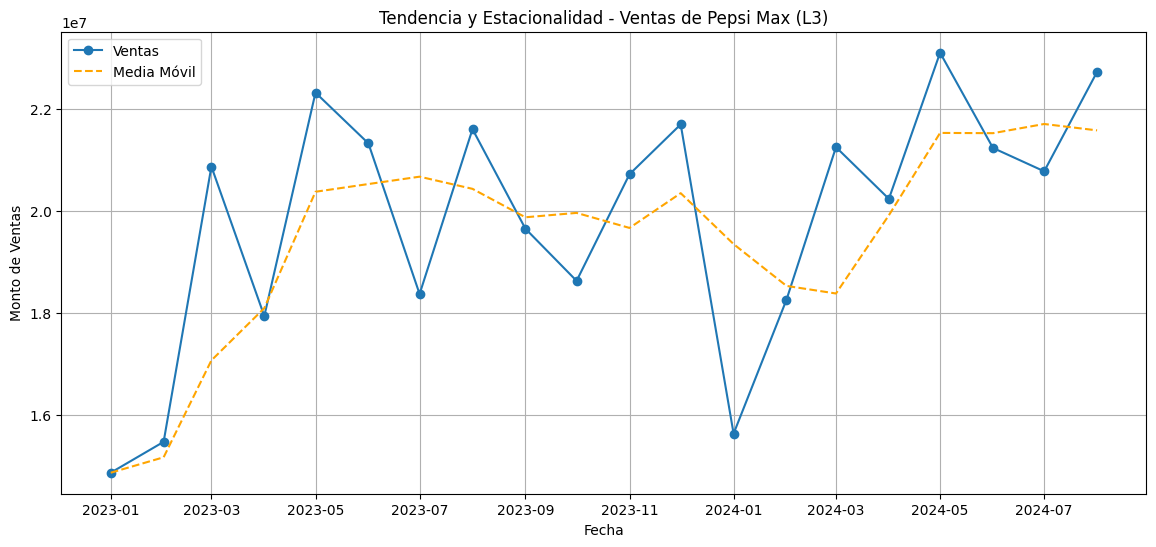

In [7]:
# Filtrar solo los registros donde SCENARIO es "actual"
df_actual = df[df['SCENARIO'] == 'actual'].copy()  # Usar .copy() para evitar el warning

# Identificar la marca con más ventas
total_ventas_por_marca = df_actual.groupby('SUBBRAND')['AMOUNT'].sum().sort_values(ascending=False)
marca_mayor_ventas = total_ventas_por_marca.index[0]

# Agrupar las ventas por año y mes
ventas_marca = df_actual[df_actual['SUBBRAND'] == marca_mayor_ventas].groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

# Calcular la media móvil (ajustar el periodo según sea necesario)
ventas_marca_media = ventas_marca.rolling(window=3, min_periods=1).mean()  # Cambia el tamaño de la ventana si es necesario

# Función para trazar la tendencia y estacionalidad
def plot_trend_seasonality(ventas, media_movil, titulo):
    ventas.index = pd.to_datetime(ventas.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))
    media_movil.index = pd.to_datetime(media_movil.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))

    plt.figure(figsize=(14, 6))
    plt.plot(ventas.index, ventas, marker='o', linestyle='-', label='Ventas')
    plt.plot(media_movil.index, media_movil, color='orange', linestyle='--', label='Media Móvil')
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Monto de Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar los resultados
plot_trend_seasonality(ventas_marca, ventas_marca_media, f'Tendencia y Estacionalidad - Ventas de {marca_mayor_ventas}')

En este caso, hemos analizado el subproducto con más ventas a lo largo de 2023 y lo que llevamos de 2024, y hemos visto que Pepsi Max(L3) es el producto mayor vendido a lo largo de los países de la base de datos.
Este modelo cuenta con una línea azul, que representa las ventas reales, y una amarilla que representa la media móvil.

Podemos ver que la línea azul, a pesar de sus constantes picos, positivos y negativos, se mentiene en un monto medio de ventas, alcanzando su mínimo en diciembre de 2023 y alcanzando su máximo en abril de 2024.
Así mismo, la media móvil nos muestra un suave crecimiento, levemente afectado en el primer cuatrimestre de 2024, aunque rápidamente recupera.

#3. Cuáles son las predicciones hechas en España y cómo de buenas son.


<ipython-input-8-c42d8f6b7567>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-c42d8f6b7567>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



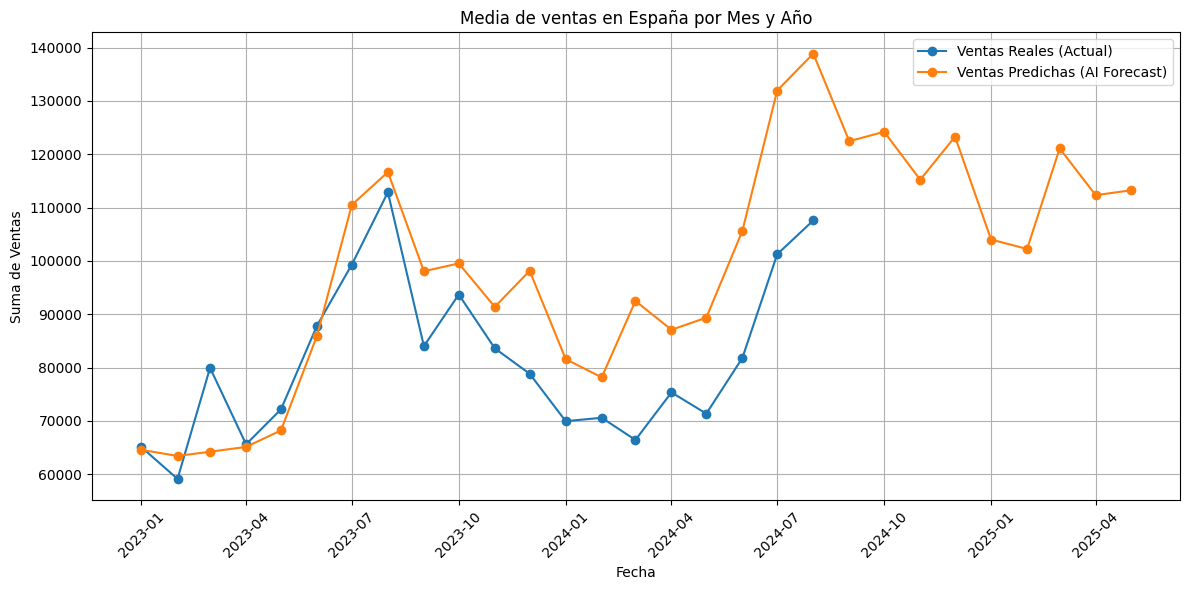

In [8]:
# Supongamos que 'df' es tu DataFrame original
# Filtrar los datos para España
df_spain = df[df['COUNTRY'] == 'Spain']

# Crear DataFrames separados para las ventas actuales y predichas
df_actual = df_spain[df_spain['SCENARIO'] == 'actual']
df_AI_forecast = df_spain[df_spain['SCENARIO'] == 'AI_forecast']

# Agrupar y sumar las ventas por mes y año
df_actual['DATE'] = pd.to_datetime(df_actual[['YEAR', 'MONTH']].assign(DAY=1))
df_AI_forecast['DATE'] = pd.to_datetime(df_AI_forecast[['YEAR', 'MONTH']].assign(DAY=1))

# Hacer la media de las ventas por mes y año
sales_actual = df_actual.groupby(df_actual['DATE'].dt.to_period("M"))['AMOUNT'].mean().reset_index()
sales_actual['DATE'] = sales_actual['DATE'].dt.to_timestamp()  # Convertir a timestamp para el gráfico

sales_forecast = df_AI_forecast.groupby(df_AI_forecast['DATE'].dt.to_period("M"))['AMOUNT'].mean().reset_index()
sales_forecast['DATE'] = sales_forecast['DATE'].dt.to_timestamp()  # Convertir a timestamp para el gráfico

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(sales_actual['DATE'], sales_actual['AMOUNT'], marker='o', label='Ventas Reales (Actual)')
plt.plot(sales_forecast['DATE'], sales_forecast['AMOUNT'], marker='o', label='Ventas Predichas (AI Forecast)')

# Configuración del gráfico
plt.title('Media de ventas en España por Mes y Año')
plt.xlabel('Fecha')
plt.ylabel('Suma de Ventas')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Para analizar cómo de buenas han sido las predicciones en España (teniendo en cuenta que teníamos 100 datos actuales y 2057 datos predictivos), se ha decidido hacer la media entre las observaciones para escalar un poco los datos. Además de haber previamente filtrado y separado los datos por COUNTRY (Spain) y por SCENARIO (actual y AI_forecast) y centrándose en la fecha y el dinero ganado.
- Teniendo en cuenta que la línea azul muestra las ventas reales, podemos ver que los datos terminan aproximadamente en la fecha a la que estamos, que hay un aumento en las ventas hasta julio de 2023 que después decae hasta principios de 2024, que después se recuperan hacia mayo de 2024.
- Teniendo en cuenta que la linea naranja muestra las ventas predichas, podemos ver que las predicciones se separan de la realidad a partir de mayo de 2023y que se predice un aumento en ventas a partir de enero de 2024

Las ventas predichas muestran una tendencia similar a las ventas reales hasta cierto punto, pero se desvían en el tiempo. Se podría decir que las predicciones son más optimistas, al mostrar un mayor incremento en las ventas a lo largo del tiempo, lo cual no siempre es conveniente.


In [9]:
import numpy as np
# Asegúrate de que ambos DataFrames tengan la misma longitud y estén alineados por fecha
merged_data = pd.merge(sales_actual, sales_forecast, on='DATE', suffixes=('_actual', '_forecast'))

# Calcular las métricas
mae = np.mean(np.abs(merged_data['AMOUNT_forecast'] - merged_data['AMOUNT_actual']))
mse = np.mean((merged_data['AMOUNT_forecast'] - merged_data['AMOUNT_actual']) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((merged_data['AMOUNT_forecast'] - merged_data['AMOUNT_actual']) / merged_data['AMOUNT_actual'])) * 100

# Mostrar resultados
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')
print(f'Porcentaje de Error Absoluto Medio (MAPE): {mape}%')

Error Absoluto Medio (MAE): 12480.126708536234
Error Cuadrático Medio (MSE): 245585154.86099878
Raíz del Error Cuadrático Medio (RMSE): 15671.156781201533
Porcentaje de Error Absoluto Medio (MAPE): 15.16930432755102%
